# Naive Bayes algorithm intuition 


Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP).
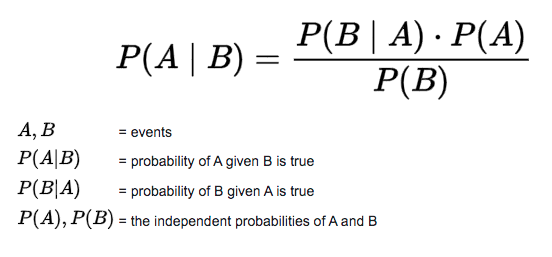

The MAP for a hypothesis with 2 events A and B is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.

In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.

# Types of Naive Bayes algorithm 

There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

Gaussian Naïve Bayes

Multinomial Naïve Bayes

Bernoulli Naïve Bayes

These 3 types of algorithm are explained below.

# Gaussian Naïve Bayes algorithm
When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class. Suppose we have some observation value xi . Then, the probability distribution of xi given a class can be computed by the following equation
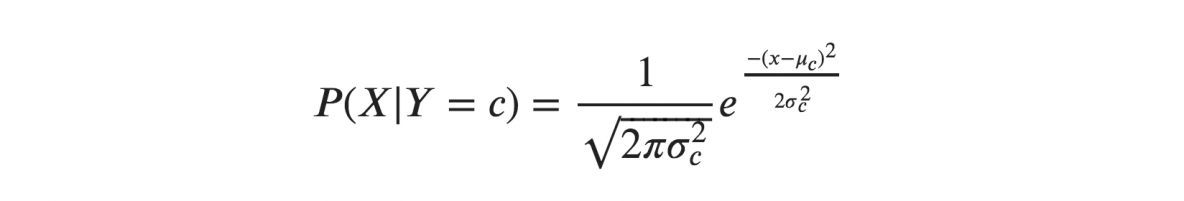

# Multinomial Naïve Bayes algorithm
With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn) where pi is the probability that event i occurs. Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.


# Bernoulli Naïve Bayes algorithm
In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencies.
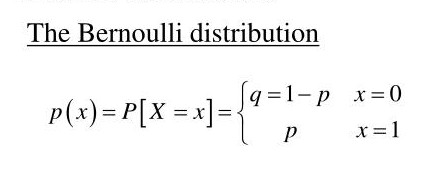

# IMPORT LIBRARY 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
from wordcloud import WordCloud
%matplotlib inline
import plotly.express as px
import warnings
import sklearn.metrics as sm
import imblearn
import string
import nltk
import re

#fitur_nltk
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import FreqDist

#fitur_sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

warnings.filterwarnings('ignore')

# DATA COLLECTION (DISCOVERY, AUGMENTATION, GENERATION)

1. DATA DISCOVERY TIDAK DIGUNAKAN

2. DATA AUGMENTATION (HASIL SCRAPPING + CHECK OVERFITTING)

3. GENERATION (IMPLEMENTASI SMOTE OVER SAMPLING )

# IMPORTING DATASET + EDA

In [2]:
df = pd.read_excel('final_dataset.xlsx').astype(str)
df

,link,text,date
0,https://www.merdeka.com/peristiwa/cita-cita-jo...,Merdeka.com - Presiden Joko Widodo (Jokowi) m...,2022
1,http://51.81.6.173/mencuri-keperjakaan-putra-t...,Walau masih 15 tahun tubuhnya tinggi dan atlet...,2022
2,https://www.merdeka.com/jakarta/tetangga-ungka...,Merdeka.com - Tetangga korban tewas sekeluarg...,2022
3,http://51.81.6.173/cerita-dewasa-ngentot-denga...,Tanganku meremas-remas payudaranya yang montok.,2022
4,https://www.merdeka.com/trending/cara-menghila...,Merdeka.com - Cara menghilangkan karat sebena...,2022
...,...,...,...
49744,https://ceritadewasa999.wordpress.com/2020/01/...,Dari penis Aku menyemprotlah air mani sebanyak...,2020
49745,https://www.domainesia.com/berita/fungsi-vpn/,Hal inilah yang kemudian membuat VPN memiliki ...,2020
49746,https://ceritadewasa999.wordpress.com/2020/01/...,Setelah kita berdua selesai Aku mengecup bibir...,2020
49747,https://www.domainesia.com/berita/fungsi-vpn/,Ada beberapa alasan yang melandasi pentingnya ...,2020


In [3]:
df = pd.DataFrame(df[['link', 'text', 'date']])

In [4]:
#fun eda
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.groupby('date').count()

,link,text
date,,
2019,7901,7901
2020,18392,18392
2021,12920,12920
2022,10536,10536


<Figure size 1500x1500 with 0 Axes>

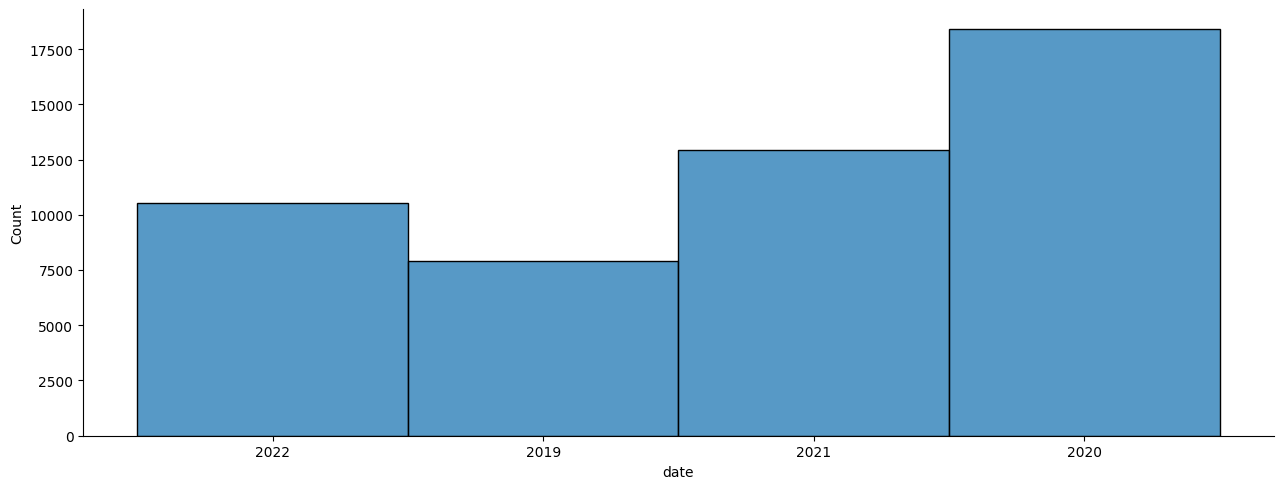

In [6]:
#dataplot
plt.figure(figsize=(15,15))
g =sns.displot(df, x="date")
g.fig.set_figwidth(15)

In [6]:
### EDA
### SHAPE DATA (HOW MANY ROWS THE DATASET)
print(f'Inputs data has {len(df)} rows, {len(df.columns)} columns')

Inputs data has 49749 rows, 3 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49749 entries, 0 to 49748
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   link    49749 non-null  object
 1   text    49749 non-null  object
 2   date    49749 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [8]:
df= df[['text']]
df

,text
0,Merdeka.com - Presiden Joko Widodo (Jokowi) m...
1,Walau masih 15 tahun tubuhnya tinggi dan atlet...
2,Merdeka.com - Tetangga korban tewas sekeluarg...
3,Tanganku meremas-remas payudaranya yang montok.
4,Merdeka.com - Cara menghilangkan karat sebena...
...,...
49744,Dari penis Aku menyemprotlah air mani sebanyak...
49745,Hal inilah yang kemudian membuat VPN memiliki ...
49746,Setelah kita berdua selesai Aku mengecup bibir...
49747,Ada beberapa alasan yang melandasi pentingnya ...


# CLEANING TEXT DATA

# CASE FOLDING
Case Folding adalah proses perubahan huruf kapital menjadi huruf kecil, jadi semua teks yang mengandung huruf kapital akan diubah menjadi huruf kecil. Tujuan dari Case Folding ini adalah agar kata-kata yang sama tidak terdeteksi berbeda hanya karena perbedaan terdapat huruf kapital.

In [9]:
df = pd.DataFrame(df[['text']])
df["text"] = df['text'].str.lower()


df = pd.DataFrame(df[['text']])
df

,text
0,merdeka.com - presiden joko widodo (jokowi) m...
1,walau masih 15 tahun tubuhnya tinggi dan atlet...
2,merdeka.com - tetangga korban tewas sekeluarg...
3,tanganku meremas-remas payudaranya yang montok.
4,merdeka.com - cara menghilangkan karat sebena...
...,...
49744,dari penis aku menyemprotlah air mani sebanyak...
49745,hal inilah yang kemudian membuat vpn memiliki ...
49746,setelah kita berdua selesai aku mengecup bibir...
49747,ada beberapa alasan yang melandasi pentingnya ...


# TOKENIZING
Tokenizing digunakan untuk memperoleh potongan kata yang akan menjadi suatu entitas dan memiliki nilai dalam penyusunan matriks dokumen pada proses berikutnya

In [10]:
#REMOVING_LINK
def remove_df_special(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    return text.replace("http://", " ").replace("https://", " ")
                
df['text'] = df['text'].apply(remove_df_special)


#REMOVE_NUMBER
def remove_df_number(text):
    return  re.sub(r"\d+", "", text)

df['text'] = df['text'].apply(remove_df_number)

#REMOVE_PUNCTUATION
def remove_df_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['text'] = df['text'].apply(remove_df_punctuation)


#REMOVE_WHITESPACE
def remove_df_whitespace(text):
    return text.strip()

df['text'] = df['text'].apply(remove_df_whitespace)

def remove_df_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['text'] = df['text'].apply(remove_df_whitespace_multiple)


def remove_df_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['text'] = df['text'].apply(remove_df_singl_char)


def word_df_tokenize(text):
    return word_tokenize(text)

df['text'] = df['text'].apply(word_df_tokenize)


#menampilkan_hasil_tokenize
df = pd.DataFrame(df[['text']])
df

,text
0,"[merdekacom, presiden, joko, widodo, jokowi, m..."
1,"[walau, masih, tahun, tubuhnya, tinggi, dan, a..."
2,"[merdekacom, tetangga, korban, tewas, sekeluar..."
3,"[tanganku, meremasremas, payudaranya, yang, mo..."
4,"[merdekacom, cara, menghilangkan, karat, seben..."
...,...
49744,"[dari, penis, aku, menyemprotlah, air, mani, s..."
49745,"[hal, inilah, yang, kemudian, membuat, vpn, me..."
49746,"[setelah, kita, berdua, selesai, aku, mengecup..."
49747,"[ada, beberapa, alasan, yang, melandasi, penti..."


# STOPWORD/FILTERING
Sebagian besar di dalam data teks terdapat kata-kata umum yang tidakmemiliki makna dan tentunya ini akan mempengaruhi keakuratan hasilanalisis dan biasanya kata-kata ini muncul dalam frekuensi yang cukupbanyak. Contoh stopword dalam kata Bahasa Inggris misalnya adalah are, is,i, am, was, were, they, you, the, dan lain sebagainya, proses penghapusankata-kata tersebut disebut Stopword Removal.

In [12]:
factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()
stopword.append('yg')
stopword.append('bhw')
stopword.append('jdi')
stopword.append('yth')
stopword.append('nya')
stopword.append('tdk')
stopword.append('dgn')
stopword.append('email')
stopword.append('tdk')
stopword.append('kontak')
stopword.append('komentar')
stopword.append('nama')

def remove_stopwords(text, stem=False):
    tokens = []
    for token in text:
        if token not in stopword:
            tokens.append(token)
    return " ".join(tokens)

df['text'] = df['text'].apply(lambda x: remove_stopwords(x))


df = pd.DataFrame(df[['text']])
df

,text
0,merdekacom presiden joko widodo jokowi menyamp...
1,aku pikirku mungkin julius tahun tubuhnya ting...
2,tio merdekacom tetangga korban tewas sekeluarg...
3,tanganku meremasremas payudaranya montok
4,karat merdekacom cara menghilangkan sebenarnya...
...,...
49744,aku air mani akkhh penis menyemprotlah sebanya...
49745,inilah kemudian membuat vpn memiliki kemampuan...
49746,aku pulang mungkin jam berdua selesai mengecup...
49747,vpn alasan kamu beberapa melandasi pentingnya ...


# STEMMING
Stemming merupakan suatu proses untuk menemukan kata dasar dari sebuah kata. Dengan menghilangkan semua imbuhan (affixes) baik yang terdiri dari awalan (prefixes), sisipan (infixes), akhiran (suffixes) dan confixes (kombinasi dari awalan dan akhiran) pada kata turunan. Stemming digunakan untuk mengganti bentuk dari suatu kata menjadi kata dasar dari kata tersebut yang sesuai dengan struktur morfologi Bahasa Indonesia yang baik dan benar.

In [13]:
st = StemmerFactory()
st_kata = st.create_stemmer()

stem_text = []
for text in df['text']:
    stem_text.append(st_kata.stem(text))
    
df['text'] = stem_text

df = pd.DataFrame(df[['text']])
df

,text
0,merdekacom presiden joko widodo jokowi sampai ...
1,aku pikir mungkin julius tahun tubuh tinggi at...
2,tio merdekacom tetangga korban tewas keluarga ...
3,tangan meremasremas payudara montok
4,karat merdekacom cara hilang benar laku mudah ...
...,...
49744,aku air mani akkhh penis semprot sebanyakbanya...
49745,ini kemudian buat vpn milik mampu relokasi dir...
49746,aku pulang mungkin jam dua selesai kecup bibir...
49747,vpn alas kamu beberapa landas penting guna dap...


# SAVING CLEANING TEXT DATA
Menyimpan hasil dari text cleaning untuk di gunakan pada tahap selanjutnya, alasan menyimpan hasil dari text cleaning ini adalah karena jumlah dataset yang cukup besar sehingga memerlukan waktu yang sedikit lama untuk melakukan cleaning (1/5-2 hours)

In [19]:
df.to_excel("fixed_clean.xlsx")

In [22]:
df.isnull().sum()

Unnamed: 0     0
text          47
dtype: int64

In [23]:
# Menghapus null values
data_clean = df.dropna()

# Menyimpan dataset yang telah dibersihkan ke dalam file Excel
data_clean.to_excel("fixed_cleaning.xlsx", index=False)

In [24]:
df = pd.read_excel("fixed_cleaning.xlsx")

In [25]:
df.isnull().sum()

Unnamed: 0    0
text          0
dtype: int64

# SCORING DOCUMENT

In [26]:
import pandas as pd

# Membaca dataset
df = pd.read_excel("fixed_cleaning.xlsx").astype(str)

# Membaca kamus pornografi dan non pornografi
pornografi_words = set(open("pornokam.txt").read().splitlines())
non_pornografi_words = set(open("nonkam.txt").read().splitlines())

# Menghitung jumlah kata pada setiap baris
df["jumlah_kata"] = df["text"].apply(lambda x: len(x.split()))

# Mencari kata-kata pada kamus pornografi dan non pornografi
df["jumlah_pornografi"] = df["text"].apply(lambda x: len([word for word in x.split() if word in pornografi_words]))
df["jumlah_non_pornografi"] = df["text"].apply(lambda x: len([word for word in x.split() if word in non_pornografi_words]))

# Menghitung rasio kata pornografi dan non pornografi
df["ratio_pornografi"] = df["jumlah_pornografi"] / df["jumlah_kata"]
df["ratio_non_pornografi"] = df["jumlah_non_pornografi"] / df["jumlah_kata"]

# Memberikan label "pornografi as (YA)" atau "non pornografi as (TIDAK)"
df["label"] = df.apply(lambda x: "YA" if x["jumlah_pornografi"] > x["jumlah_non_pornografi"] else "TIDAK", axis=1)
df

,Unnamed: 0,text,jumlah_kata,jumlah_pornografi,jumlah_non_pornografi,ratio_pornografi,ratio_non_pornografi,label
0,0,merdekacom presiden joko widodo jokowi sampai ...,18,17,18,0.944444,1.000000,TIDAK
1,1,aku pikir mungkin julius tahun tubuh tinggi at...,52,52,46,1.000000,0.884615,YA
2,2,tio merdekacom tetangga korban tewas keluarga ...,25,23,25,0.920000,1.000000,TIDAK
3,3,tangan meremasremas payudara montok,4,4,2,1.000000,0.500000,YA
4,4,karat merdekacom cara hilang benar laku mudah ...,28,22,28,0.785714,1.000000,TIDAK
...,...,...,...,...,...,...,...,...
49697,49744,aku air mani akkhh penis semprot sebanyakbanya...,36,36,25,1.000000,0.694444,YA
49698,49745,ini kemudian buat vpn milik mampu relokasi dir...,13,11,13,0.846154,1.000000,TIDAK
49699,49746,aku pulang mungkin jam dua selesai kecup bibir...,29,29,21,1.000000,0.724138,YA
49700,49747,vpn alas kamu beberapa landas penting guna dap...,15,13,15,0.866667,1.000000,TIDAK


In [27]:
df.groupby('label').count()

,Unnamed: 0,text,jumlah_kata,jumlah_pornografi,jumlah_non_pornografi,ratio_pornografi,ratio_non_pornografi
label,,,,,,,
TIDAK,32405,32405,32405,32405,32405,32405,32405
YA,17297,17297,17297,17297,17297,17297,17297


In [28]:
df.to_excel('final_scoring_doc49K.xlsx', index=False)

# DATA VISUALIZATION AFTER CLEANING THE TEXT

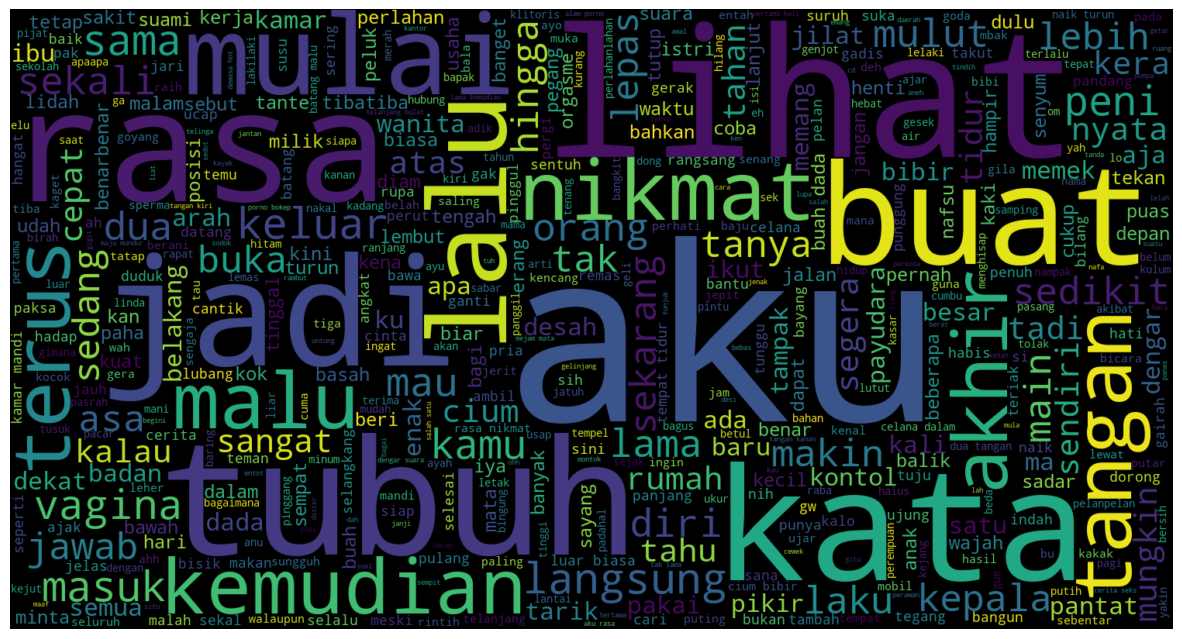

In [29]:
### DATA VISUALIZATION FOR PORN
text = " ".join(df[df['label'] == 'YA']['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

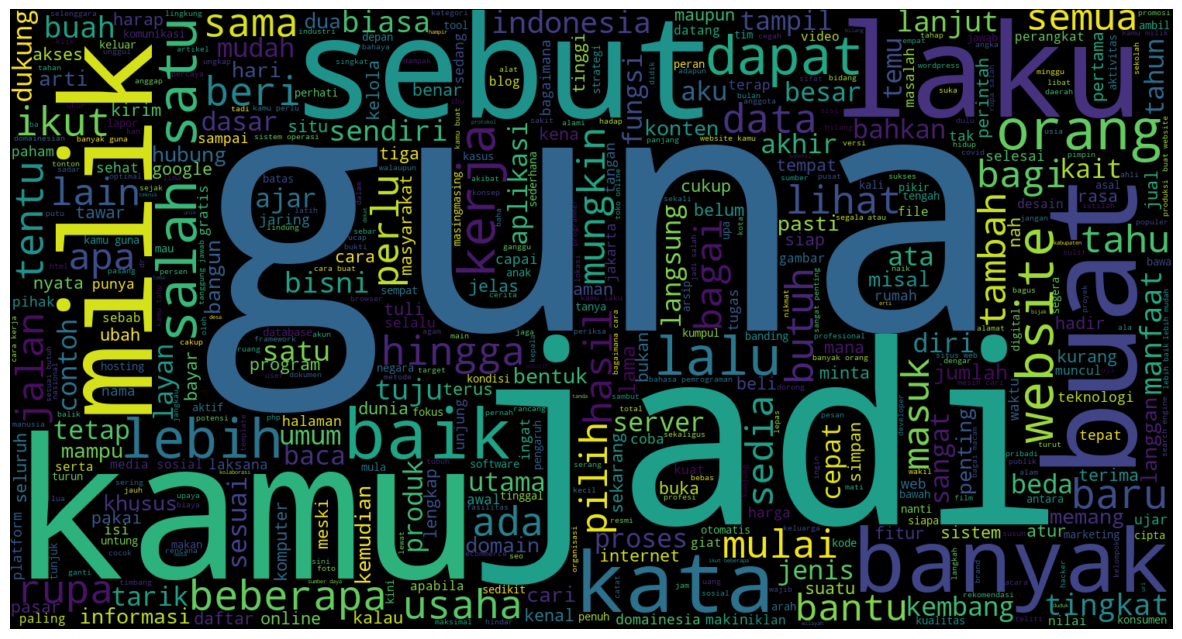

In [30]:
### DATA VISUALIZATION FOR NON-PORN
text = " ".join(df[df['label'] =='TIDAK']['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

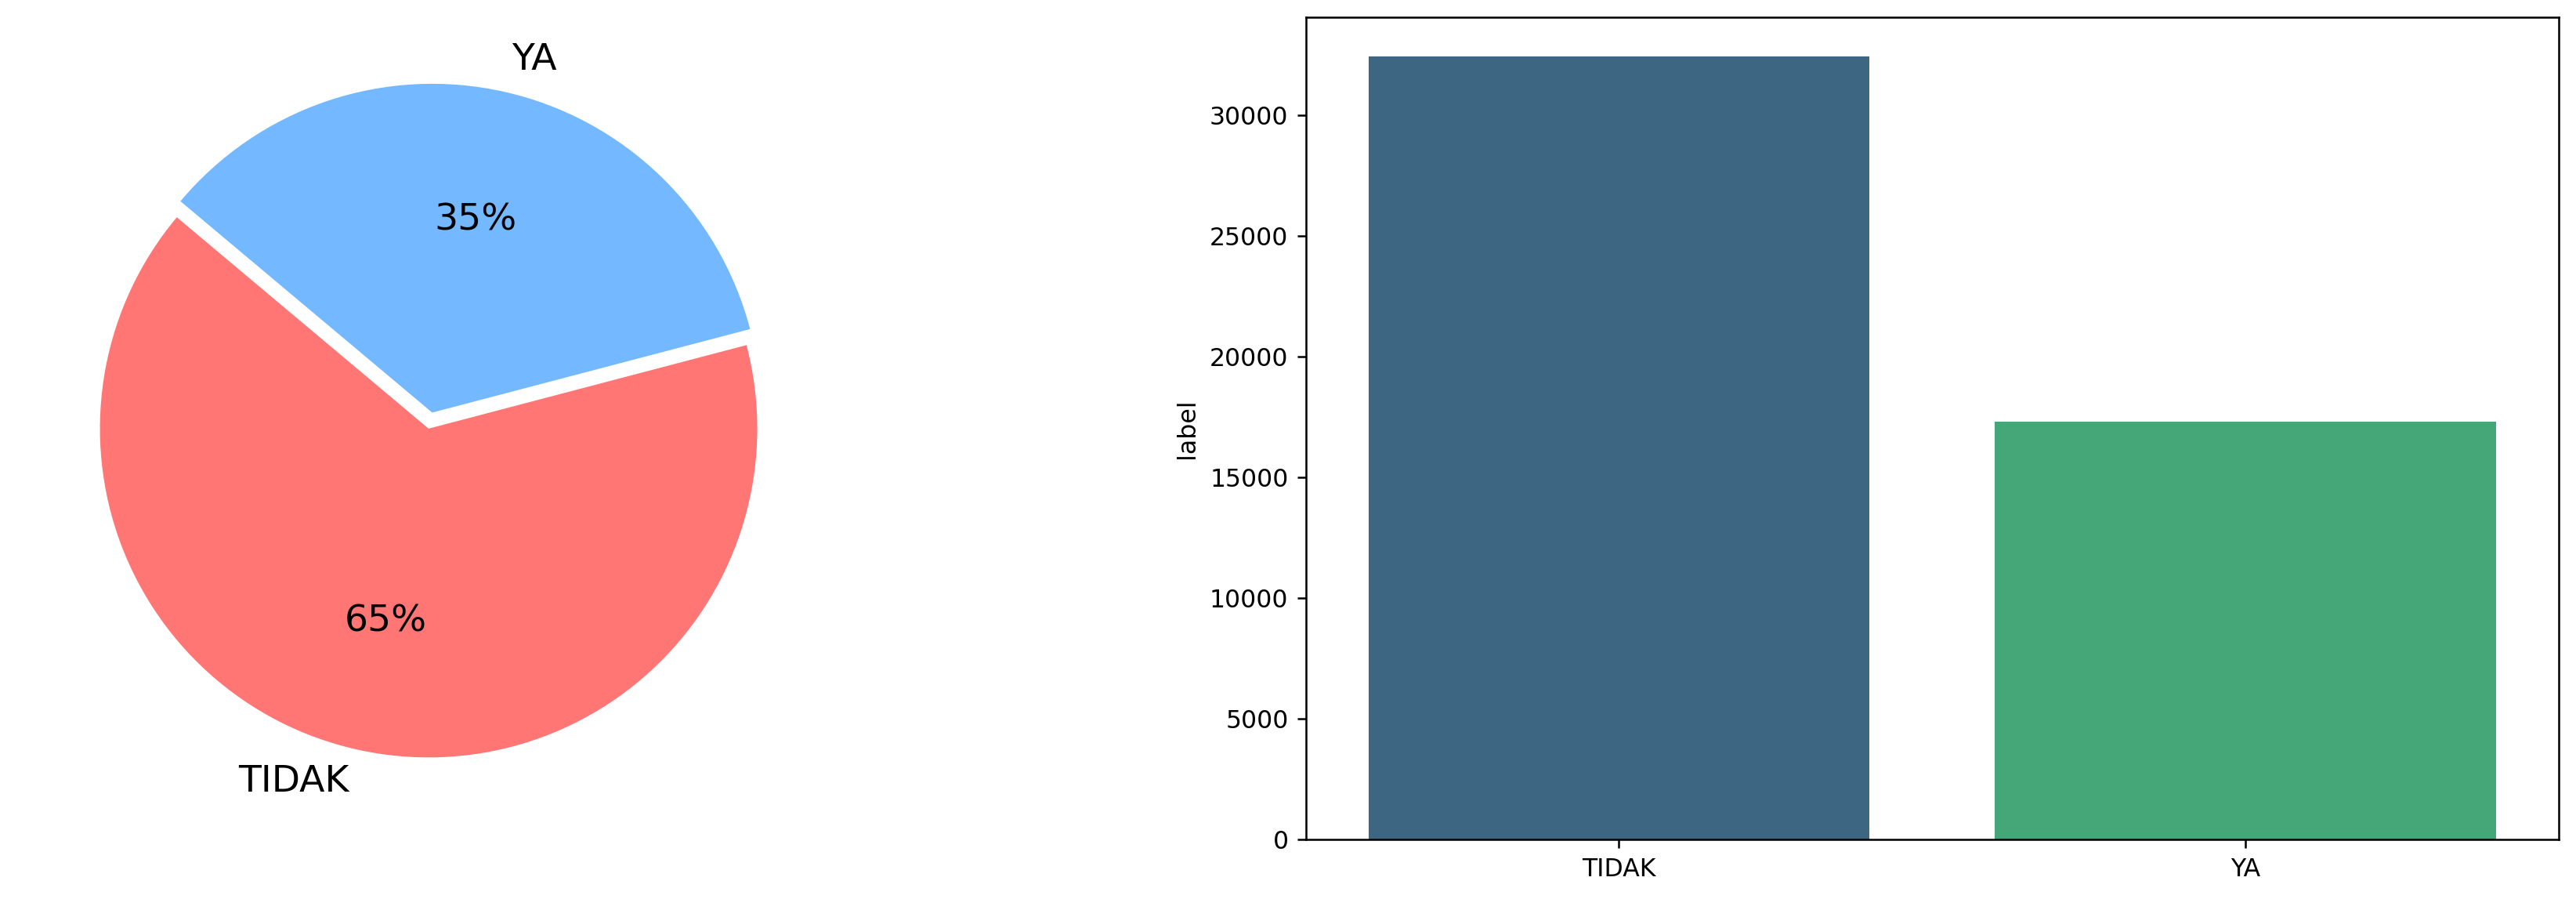

In [31]:
labels = ['TIDAK', 'YA']
sizes = [32405, 17297]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), palette= 'viridis')

plt.show()

# START USED THE CLEANING DATA

In [5]:
df = pd.read_excel('final_scoring_doc49K.xlsx')
df

,Unnamed: 0,text,jumlah_kata,jumlah_pornografi,jumlah_non_pornografi,ratio_pornografi,ratio_non_pornografi,label
0,0,merdekacom presiden joko widodo jokowi sampai ...,18,17,18,0.944444,1.000000,TIDAK
1,1,aku pikir mungkin julius tahun tubuh tinggi at...,52,52,46,1.000000,0.884615,YA
2,2,tio merdekacom tetangga korban tewas keluarga ...,25,23,25,0.920000,1.000000,TIDAK
3,3,tangan meremasremas payudara montok,4,4,2,1.000000,0.500000,YA
4,4,karat merdekacom cara hilang benar laku mudah ...,28,22,28,0.785714,1.000000,TIDAK
...,...,...,...,...,...,...,...,...
49697,49744,aku air mani akkhh penis semprot sebanyakbanya...,36,36,25,1.000000,0.694444,YA
49698,49745,ini kemudian buat vpn milik mampu relokasi dir...,13,11,13,0.846154,1.000000,TIDAK
49699,49746,aku pulang mungkin jam dua selesai kecup bibir...,29,29,21,1.000000,0.724138,YA
49700,49747,vpn alas kamu beberapa landas penting guna dap...,15,13,15,0.866667,1.000000,TIDAK


In [6]:
df = pd.DataFrame(df[['text', 'label']])

# LABELING DATA
Labeled data is used in supervised learning, whereas unlabeled data is used in unsupervised learning .

Saat melakukan klasifikasi, biasanya akan menangani banyak label. Label ini bisa berbentuk kata, angka, atau yang lainnya. Fungsi mesin learning di sklearn mengharapkan mereka menjadi angka. Jadi kalau sudah ada angka, kita bisa pakai langsung untuk memulai pelatihan. Tetapi biasanya tidak demikian.

Dalam dunia nyata, label berbentuk kata-kata, karena kata-kata dapat dibaca oleh manusia. Misalnya diberi label data pelatihan dengan kata-kata sehingga pemetaan dapat dilacak. Untuk mengubah kata label menjadi angka, kita perlu menggunakan label encoder ( Pengkodean Label). Pengkodean label mengacu pada proses mengubah label kata menjadi bentuk numerik. 

In [7]:
#### converts the category to labels using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']= le.fit_transform(df['label'].values)

In [8]:
df

,text,label
0,merdekacom presiden joko widodo jokowi sampai ...,0
1,aku pikir mungkin julius tahun tubuh tinggi at...,1
2,tio merdekacom tetangga korban tewas keluarga ...,0
3,tangan meremasremas payudara montok,1
4,karat merdekacom cara hilang benar laku mudah ...,0
...,...,...
49697,aku air mani akkhh penis semprot sebanyakbanya...,1
49698,ini kemudian buat vpn milik mampu relokasi dir...,0
49699,aku pulang mungkin jam dua selesai kecup bibir...,1
49700,vpn alas kamu beberapa landas penting guna dap...,0


# SPLITING X AND Y 
Membagi dataset yang bertujuan untuk train/test feature engineering 
1. TFIDIF
2. ROBUST SCALLER
3. SMOTE 

In [9]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features= 5000,  min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [11]:
joblib.dump(tfidf, 'tfidf.joblib')

['tfidf.joblib']

In [8]:
X_train = pd.DataFrame(X_train, columns=tfidf.get_feature_names_out())

In [9]:
X_train

,aa,aaah,aaahh,aaahhh,aah,aahh,aahhh,ab,abadi,abai,...,yuni,yups,zacky,zakar,zakat,zaman,zarina,zaskia,zat,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
tfidf.get_feature_names_out()

array(['aa', 'aaah', 'aaahh', ..., 'zaskia', 'zat', 'zoom'], dtype=object)

In [11]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((34791, 5000), (14911, 5000))

In [12]:
y_train.shape, y_test.shape

((34791,), (14911,))

In [13]:
X_test = pd.DataFrame(X_test, columns=tfidf.get_feature_names_out())

In [14]:
X_test

,aa,aaah,aaahh,aaahhh,aah,aahh,aahhh,ab,abadi,abai,...,yuni,yups,zacky,zakar,zakat,zaman,zarina,zaskia,zat,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}\n".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 12108
Before OverSampling, counts of label '0': 22683 

After OverSampling, the shape of train_X: (45366, 5000)
After OverSampling, the shape of train_y: (45366,) 

After OverSampling, counts of label '1': 22683
After OverSampling, counts of label '0': 22683



In [16]:
X_train_res

,aa,aaah,aaahh,aaahhh,aah,aahh,aahhh,ab,abadi,abai,...,yuni,yups,zacky,zakar,zakat,zaman,zarina,zaskia,zat,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

# MODEL TRAINING 

*Gaussian NB*
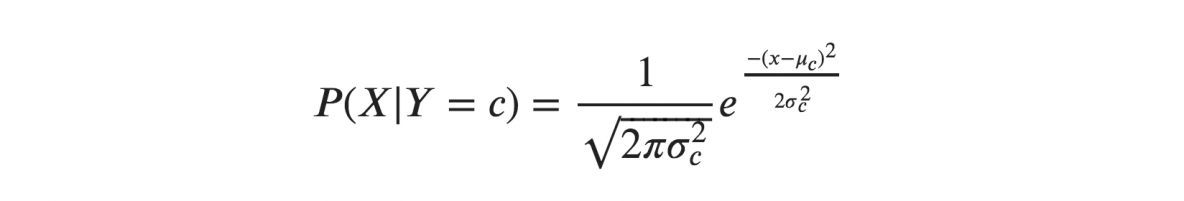

*Bernoulli NB*
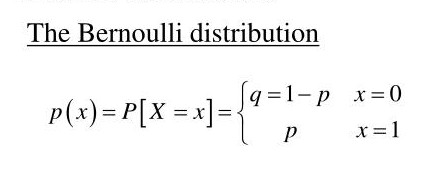

*Multinominal NB*


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_curve, auc, precision_recall_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, validation_curve

In [20]:
models = []
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['MultinomialNB', MultinomialNB()])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 5)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print('Cross-validation scores:{}'.format(accuracies))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100)
    lst_2.append(accuracies)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

GaussianNB :
[[5079  110]
 [ 993 8729]]
Accuracy Score:  0.9260277647374422

Cross-validation scores:[0.94126074 0.93794776 0.94489144 0.94885925 0.94974099]

K-Fold Validation Mean Accuracy: 94.45 %

Standard Deviation: 0.45 %

ROC AUC Score: 0.94

Precision: 0.84

Recall: 0.98

F1: 0.90
-----------------------------------

BernoulliNB :
[[4734  455]
 [ 533 9189]]
Accuracy Score:  0.9337401918047079

Cross-validation scores:[0.93321578 0.925383   0.93023256 0.92879974 0.93420037]

K-Fold Validation Mean Accuracy: 93.04 %

Standard Deviation: 0.32 %

ROC AUC Score: 0.93

Precision: 0.90

Recall: 0.91

F1: 0.91
-----------------------------------

MultinomialNB :
[[5041  148]
 [ 839 8883]]
Accuracy Score:  0.9338072563879015

Cross-validation scores:[0.94511792 0.944671   0.94577317 0.94632426 0.94235644]

K-Fold Validation Mean Accuracy: 94.48 %

Standard Deviation: 0.14 %

ROC AUC Score: 0.94

Precision: 0.86

Recall: 0.97

F1: 0.91
-----------------------------------



In [21]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'Cross-validation','K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [22]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [23]:
df

,Model,Accuracy,Cross-validation,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
2,MultinomialNB,93.380726,"[0.9451179193299537, 0.9446710018736911, 0.945...",94.484856,0.136728,0.942590,0.857313,0.971478,0.910832
1,BernoulliNB,93.374019,"[0.9332157813533172, 0.9253830045189022, 0.930...",93.036629,0.316623,0.928745,0.898804,0.912315,0.905509
0,GaussianNB,92.602776,"[0.9412607449856734, 0.9379477570814505, 0.944...",94.454004,0.447305,0.938331,0.836462,0.978801,0.902051


In [24]:
df.to_excel('model_select.xlsx', index=False)

# GRID SEARCH
The GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit the estimator (model) on your training set.

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid_models = [(MultinomialNB(),[{'alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0]}])]

In [27]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 5)
    grid.fit(X_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

MultinomialNB():
Best Accuracy : 94.61%
Best Parameters :  {'alpha': 0.1}

----------------



# TUNNING THE HYPERPARAMETERS 

# 1. Multinominal (alpha: 0.1)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      9722
           1       0.86      0.97      0.91      5189

    accuracy                           0.94     14911
   macro avg       0.92      0.94      0.93     14911
weighted avg       0.94      0.94      0.94     14911

ROC AUC score: 0.9873190538163489
Accuracy Score:  0.9350814834685802


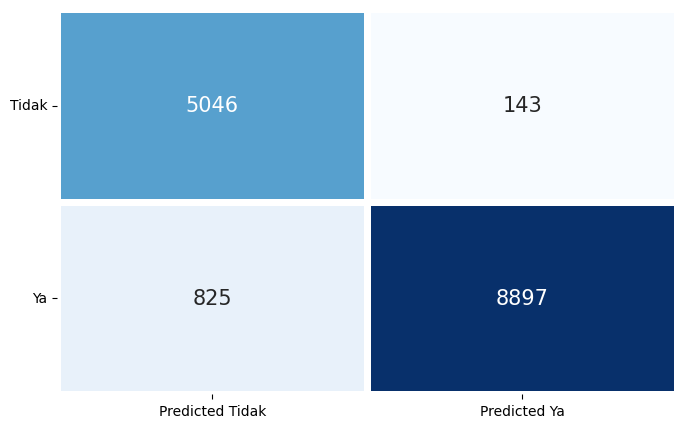

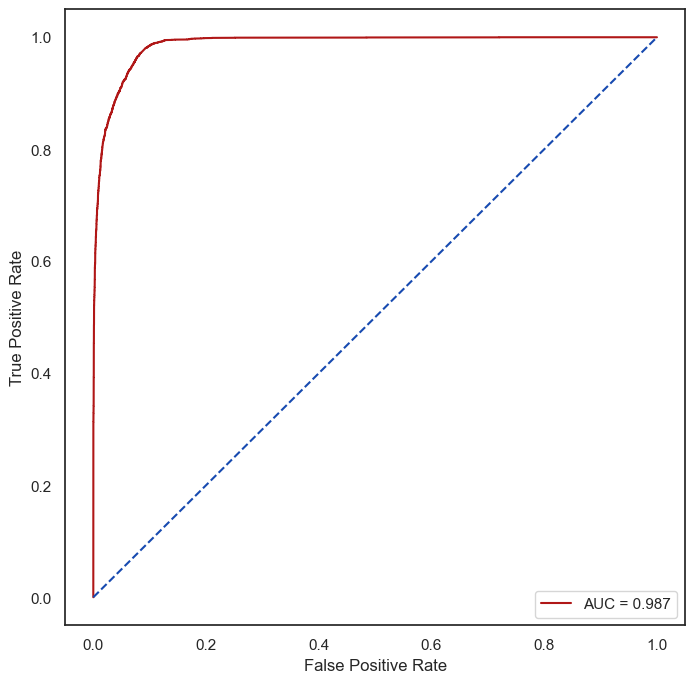

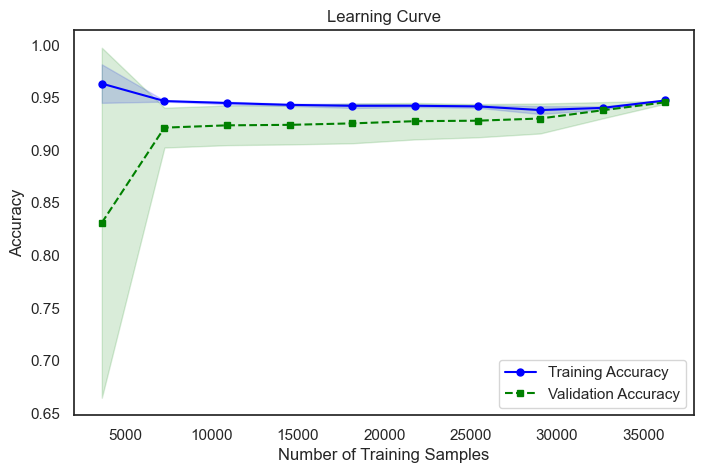

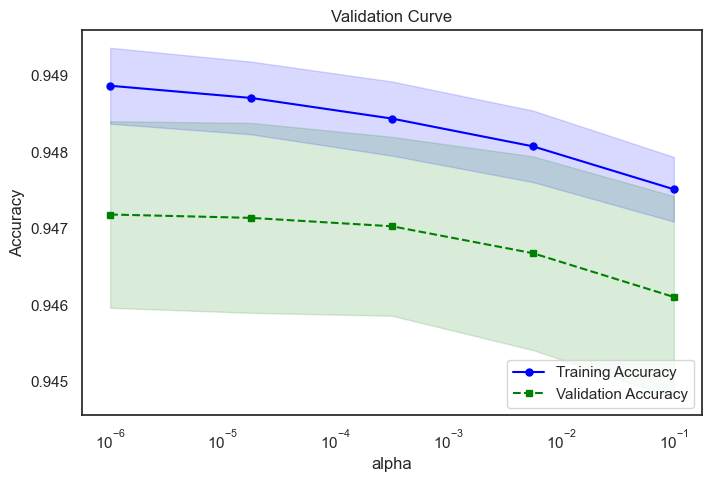

In [28]:
#Fitting MNB Model
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Tidak', 'Ya'], xticklabels = ['Predicted Tidak', 'Predicted Ya'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train_res, y_train_res, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Validation Curve
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(classifier, X_train_res, y_train_res, param_name='alpha', param_range=param_range, cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xscale('log')
plt.title('Validation Curve')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# PREDICTION

In [29]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

# CHECKING THE ACCURACY

In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9351


*y_test are the true class labels and y_pred are the predicted class labels in the test-set.*

# Compare the train-set and test-set accuracy

In [31]:
y_pred_train = classifier.predict(X_train_res)

y_pred_train

array([0, 0, 1, ..., 1, 1, 1])

In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_res, y_pred_train)))

Training-set accuracy score: 0.9473


# ANOTHER SIMPLE WAYS TO CHECK IF THE MODEL IS OVERFITTING AND UNDERFITTING

In [33]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train_res, y_train_res)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.9473
Test set score: 0.9351


*The training-set accuracy score is 0.9473 while the test-set accuracy to be 0.9351. These two values are quite comparable. So, there is no sign of overfitting.*

# COMPARING THE MODEL WITH NULL ACC
The model accuracy is 0.9351. But, i cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, i should first check the class distribution in the test set.

In [34]:
# check class distribution in test set

y_test.value_counts()

0    9722
1    5189
Name: label, dtype: int64

*Most frequent class is 9722. So, then calculate the null accuracy by dividing 9722 by total number of occurences.*

In [35]:
# check null accuracy score

null_accuracy = (9722/(9722+5189))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6520


* Model accuracy score is 0.9351 but null accuracy score is 0.6520. that means Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels. Based on the above analysis I can conclude that my classification model accuracy is very good. My model is doing a very good job in terms of predicting the class labels.*

* But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors my classifer is making.* 

* Another tool called Confusion matrix .* 

# CONFUSSION MATRIX
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [36]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=[1,0])

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5046  143]
 [ 825 8897]]

True Positives(TP) =  5046

True Negatives(TN) =  8897

False Positives(FP) =  143

False Negatives(FN) =  825


The confusion matrix shows `8897 + 5046 = 13.943 correct predictions` and `825 + 143 = 968 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) -  5046


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 8897


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 143 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 825 `(Type II error)`

<AxesSubplot: >

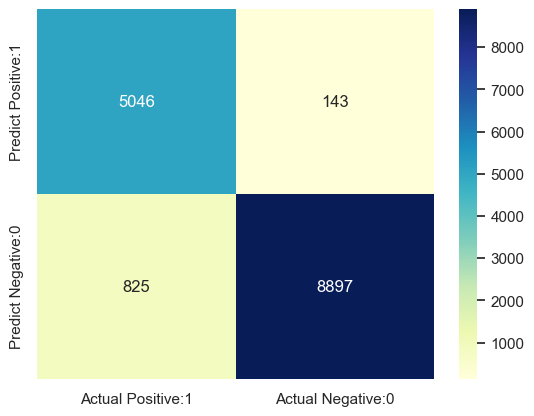

In [37]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# CLASSIFICATION METRICES

# Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      9722
           1       0.86      0.97      0.91      5189

    accuracy                           0.94     14911
   macro avg       0.92      0.94      0.93     14911
weighted avg       0.94      0.94      0.94     14911



# CLASSIFICATION ACC

In [39]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [40]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.9351


# CLASSIFICATION ERROR

In [41]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0649


# PRECISSION

**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.

In [42]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9724


# RECALL
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.

In [43]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8595


In [44]:
f1_score = 2*(precision * recall)/(precision + recall)

print('F1-Score : {0:0.4f}'.format(f1_score))

F1-Score : 0.9125


# TPR

In [45]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8595


# FPR

In [46]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0158


# SPECIFICITY

In [47]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9842


# CALCULATE CLASS PROB

In [48]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = classifier.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99994665e-01, 5.33515791e-06],
       [9.98572937e-01, 1.42706306e-03],
       [9.99997342e-01, 2.65813976e-06],
       [1.37649709e-03, 9.98623503e-01],
       [3.12680057e-08, 9.99999969e-01],
       [1.06337418e-02, 9.89366258e-01],
       [4.61610584e-01, 5.38389416e-01],
       [9.99519262e-01, 4.80738479e-04],
       [9.99346070e-01, 6.53929929e-04],
       [9.99953743e-01, 4.62565168e-05]])

# Observations
​
​
- In each row, the numbers sum to 0 & 1.
​
​
- There are 2 columns which correspond to 2 classes - `0` and `1`.
​
    - Class 0 => Non-Pornografi - Class that not contains pornography.    
    
    - Class 1 => Pornografi  - Class that contains pornography. 
        
    
- Importance of predicted probabilities
​
    - Rank the observations by probability of whether a text makes less than or equal to Non-Pornography or pornography.
​
​
- predict_proba process
​
    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level
​
    - There is a classification threshold level of 0.5.    
    
    - Class 0 =>  Non-Pornografi - probability of text document less than or equal to Non-Pornografi is predicted if probability < 0.5.    
    
    - Class 1 => Pornografi - probability of text document predicted in pornography is predicted if probability > 0.5.    

In [49]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Tidak', 'Prob of Ya'])

y_pred_prob_df

,Prob of - Tidak,Prob of Ya
0,9.999947e-01,0.000005
1,9.985729e-01,0.001427
2,9.999973e-01,0.000003
3,1.376497e-03,0.998624
4,3.126801e-08,1.000000
5,1.063374e-02,0.989366
6,4.616106e-01,0.538389
7,9.995193e-01,0.000481
8,9.993461e-01,0.000654
9,9.999537e-01,0.000046


In [50]:
# print the first 10 predicted probabilities for class 1 

classifier.predict_proba(X_test)[0:10, 1]

array([5.33515791e-06, 1.42706306e-03, 2.65813976e-06, 9.98623503e-01,
       9.99999969e-01, 9.89366258e-01, 5.38389416e-01, 4.80738479e-04,
       6.53929929e-04, 4.62565168e-05])

In [51]:
# store the predicted probabilities for class 1 
y_pred1 = classifier.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

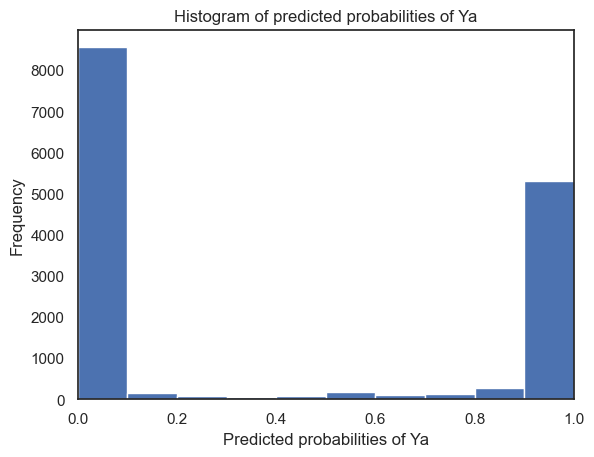

In [52]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Ya')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Ya')
plt.ylabel('Frequency')

# Observations


- Looking at that histogram is almost have got balance.


- The first column is there are approximately 8897 observations with probability between 0.0 and 0.4 are not contains pornography.


- There are lower number of observations with probability > 0.5.


- So, these lower number of observations predict that the text document are contains pornography.


- Majority of observations predcit that the text document will not contains pornography.

# ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.




**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).


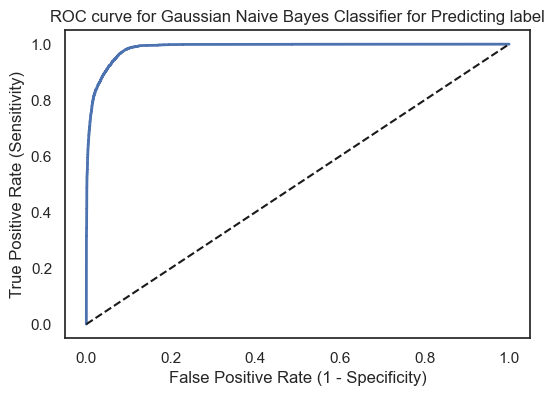

In [53]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting label')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


*ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1*

In [54]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9873


In [55]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(classifier, X_train_res, y_train_res, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9782


# K-FOLD CROSS VALIDATION

In [56]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train_res, y_train_res, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.94588935 0.94610382 0.94665491 0.94797752 0.94389948]


*summarize the cross-validation accuracy by calculating its mean.*

In [57]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9461


- Using the mean cross-validation, I can conclude that the model to be around 94.61% accurate on average.

- Take a look at all the 5 scores produced by the 5-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 94.43% accuracy to 94.73% accuracy. So, I can conclude that the model is independent of the particular folds used for training.

- original model accuracy is 94%, but the mean cross-validation accuracy is 94.61%. So, the 5-fold cross-validation accuracy does  a good work for the final result in performance improvement for this model.

In [58]:
# perform k-fold cross-validation and calculate metrics
scores_accuracy = cross_val_score(classifier, X_train_res, y_train_res, cv=5, scoring='accuracy')
scores_precision = cross_val_score(classifier, X_train_res, y_train_res, cv=5, scoring='precision')
scores_recall = cross_val_score(classifier, X_train_res, y_train_res, cv=5, scoring='recall')
scores_f1 = cross_val_score(classifier, X_train_res, y_train_res, cv=5, scoring='f1')

# create DataFrame to store results
results_df = pd.DataFrame({
    'Accuracy': scores_accuracy,
    'Precision': scores_precision,
    'Recall': scores_recall,
    'F1-Score': scores_f1
})

# calculate and add mean values to DataFrame
results_df.loc['Mean'] = results_df.mean()

# save results to Excel file
results_df.to_excel('cross_validation.xlsx', index=False)

In [60]:
import joblib

# Menyimpan model
joblib.dump(classifier, 'model_mnb.pkl')

['model_mnb.pkl']

In [1]:
import joblib

# Membuka model
classifier = joblib.load('model_mnb.pkl')

In [2]:
tfidf = joblib.load('tfidf.joblib')

In [4]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: entot gue
entot gue
Klasifikasi: Pornografi


C:\Users\user\.conda\envs\try2\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


# SISTEM KLASIFIKASI

In [3]:
# Fungsi untuk melakukan prediksi label teks
def get_class(text):
    # Mengubah teks menjadi vektor fitur
    text_vector = tfidf.transform(text).toarray()
    
    # Melakukan prediksi menggunakan model klasifikasi
    classification = classifier.predict(text_vector)
    
    # Menampilkan hasil prediksi
    if classification [0] > 0.5:
        print("Klasifikasi: Pornografi")
    else:
        print("Klasifikasi: Non-Pornografi")

In [60]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: Cerita Dewasa  Cerita Sex, Kisah Seks Dewasa Bergambar 2020 Cerita Dewasa Ngentot Cewek ABG Belia Novel Cinta Romantis Dan Hot Ditulis oleharra mariaJanuari 10, 2020Diposkan padaCerita Ngentot, Cerita Sex Bergambar Tag:Cerita Memek Mesum, Cerita Sex Papa Mertua, Janda Gila Sex, Novel Cinta Romantis Dan Hot	  Cerita Sex Terbaru – setelah sebelumnya ada Kisah Nyata Memperkosa Adik Pacarku, kini ada cerita seks bergambar Cerita Dewasa Ngentot Cewek ABG Belia. selamat membaca dan menikmati sajian khusus kategori Cerita Dewasa berikut ini.  Cerita seks dewasa kali ini mengisahkan seorang cowok sma yang berhasil ngentot cewek abg. Gadis abg yang masih belia umur 14 tahun tanpa sadar menjadi pemuas seks nafsu birahi cowok sma tersebut. Rayuan gombal si cowok mampu memperdaya sang gadis abg belia tersebut. Seperti apa cerita seks dewasa nya, simak berikut ini. Cerita Dewasa Ngentot Cewek ABG Belia  Pada tahun 1994 Aku tercatat sebagai siswa baru pada SMUN 2 pada waktu itu seba

In [61]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: bertahun-tahun setiap musim kemarau tiba, daerahku mengalami kekeringan. Sebenarnya ada sebuah sumber air dari mata air yang melimpah, namun jarak dari desaku menuju sumber air itu cukup jauh dan terjal. Seandainya saja ada saluran air yang bisa mengalirkan air dari mata air itu menuju pesawahan dan perkebunan kami, setiap musim kemarau petani di desaku tidak akan mengalami gagal panen. Syukurlah, minggu itu datang puluhan anggota TNI AD yang akan membantu warga desa membuat saluran air dari mata air menuju desa kami. Wah, ternyata banyak yang gagah dan tampan juga para personel tentara itu. Karena aku adalah anak kepala desa dan sudah remaja, aku ikut ambil bagian dalam kerja bakti membangun saluran air tersebut. Ada satu tentara yang mencuri perhatianku. Dibandingkan dengan yang lain, tubuh tentara itu paling besar dan paling kekar. Sepertinya dia sendiri sadar akan hal itu dan dengan bangga menunjukkannya dengan cara melepas kausnya saat bekerja, padahal matahari be

In [62]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: Kisah Lesbi Dua Cewek Sange’ – Halo, ini adalah cerpen panas pertama karangan saya. Mengisahkan tentang sepasang cewek lesbi yang memiliki hubungan terlarang. Mudah-mudahan mau dipublish di blog Cerita Dewasa 101 ya. Begini ceritanya :  Marissa (24 tahun, selanjutnya disebut Risa) adalah seorang mahasiswi di sebuah perguruan tinggi swasta di kota Yogyakarta. Setelah semester 6 ini dia libur selama sekitar satu bulan. Dia mengisi waktu dengan melakukan kerja praktek pada sebuah industri di sebuah kota di Jawa Tengah. Karena tidak mempunyai saudara atau teman di kota tersebut, maka oleh direksi industri tersebut dia dititipkan ke rumah kontrakan salah satu karyawati yang bernama Gia Amalia (23 tahun, selanjutnya disebut Gia). Kebetulan Gia tinggal sendirian di rumah itu.  Malam itu Risa telah tiba di rumah Gia dan langsung dijamu dengan makan malam. Mereka berdua berbincang-bincang mengenai banyak hal. Selesai makan malam pun mereka masih asyik berbincang-bincang. Selama

In [63]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: Pentilsusu – Cerita Seks Memuaskan Tante Yang Bisex Bersama Teman Perempuanya, Kisah ini tentang Aku, tante Anna dan Temannya Tante Susi Kali ini saya kedatangan Tante saya, Tante Anna dan temannya yang saya panggil dengan Mbak Susi. Mbak Susi adalah orang sunda asli dengan kulitnya yang putih bersih, tinggi 167 cm dengan berat 50 kg sesuai dengan payudara yang saya perkirakan 34A, pasti membikin orang menoleh pada Mbak Susi  Umur Mbak Susi sekitar 36 tahun, 3 tahun lebih tua dari saya, makanya saya panggil dengan Mbak Tante Anna orangnya supel dengan tinggi 171 cm, berat 53 kg dan berkulit kuning langsat dengan payudara yang kencang karena rajin fitnes, ukuran 34B Cantiknya seperti artis kira-kira dan Mbak Susi seperti artis Venna Melinda Mereka berdua ke Lombok dalam rangka tugas perusahaan selama lima hari  “Ndi, nanti anterin Mbak Susi ya” kata Tante Anna sambil membereskan pakaian dalamnya “Kemana Tante?” jawab saya sekenanya, sambil jelalatan melihat BH merah pun

In [64]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: Tukar Ngentot Istri Liburan  Mau coba ngepost pengalamanku ya…tapi karena yang kutulis ini kisah nyata, nama-nama yang terlibat akan diganti semua. Mulanya aku iseng doang, pada suatu pagi, waktu istriku mau ganti pakaian, kurekam dengan video hpku. Dia nggak nyadar sama sekali kalau aku sedang merekamnya terutama waktu dia telanjang bulat. Beberapa hari kemudian, entah kenapa aku punya semangat aneh, ingin memperlihatkan rekaman di hpku itu kepada Benny, sahabat dekatku.  “Lihat nih, bini aku sexy kan?” kataku bangga. Benny melotot dan berdecak kagum, “sexy sekali ?” “Yani (nama istri Benny) pernah direkam gini?” tanyaku tetap dengan nada bangga. “Belum,” Benny menggeleng, “Tapi mau ah…nanti malam aku mau ML sama dia, sekalian direkam diam-diam.” “Sip! Nanti lihatin ke aku ya,” kataku bersemangat, “sekalian aku juga nanti malam mau ML sama istriku, sambil direkam juga.” “Terus besok hasilnya tukaran ya, punya kamu lihatin ke aku, punya aku lihatin ke kamu,” usul Benny

In [65]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: Pengertian Lagu Wajib beserta Ciri, Lirik, dan Contohnya Berita Terkini Konten dari Pengguna 31 Januari 2023 17:23 • waktu baca 2 menit sosmed-whatsapp-white copy-link-circle more-vertical Tulisan dari Berita Terkini tidak mewakili pandangan dari redaksi kumparan Ilustrasi Pengertian Lagu Wajib                  Sumber www.unsplash.com zoom-in-whitePerbesar Ilustrasi Pengertian Lagu Wajib                  Sumber www.unsplash.com Lagu wajib merupakan salah satu dari jenis lagu Nusantara. Jelaskan pengertian lagu wajib! Pengertian, ciri, lirik, dan contohnya dapat disimak dalam artikel berikut ini. Warga negara Indonesia wajib mengetahui dan mengenal lagu wajib nasional. Oleh sebab itu, lagu wajib mulai diajarkan dari tingkat pendidikan dasar hingga perguruan tinggi. Peserta didik diharapkan dapat mengetahui, mengerti, memahami sejarah, perjuangan bangsa, cinta tanah air, dan memperluas wawasan kebangsaan.  Baca juga: Lirik Lagu Ibu Kita Kartini, Lagu Wajib Nasional Cipta

In [66]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: Dikabarkan Gabung PAN, Wiranto Buka Suara Eva Safitri - detikNews Kamis, 02 Mar 2023 16:45 WIB Wiranto di UGM, 21/1/2020 Ketua Wantimpres Wiranto (Foto: Usman Hadi/detikcom) Jakarta -  Ketua Dewan Pertimbangan Presiden (Wantimpres) Wiranto dikabarkan gabung Partai Amanat Nasional (PAN). Wiranto akhirnya buka suara.  Wiranto menilai kabar dirinya bergabung ke PAN hanya isu belaka. Dia meminta publik menunggu.  "Kan isu, masa saya jawabin isu, tunggu," kata Wiranto di Kompleks Istana Merdeka, Jakarta Pusat, Kamis (2/3/2023).  ADVERTISEMENT  SCROLL TO RESUME CONTENT  Lantas saat ditanya apakah bergabungnya ke PAN persiapan untuk Pemilu 2024, Wiranto enggan berkomentar. Wiranto memastikan masih fokus kerja di Wantimpres. Baca juga: Sekjen PAN Tak Sangkal Wiranto Mau Gabung: Tempati Posisi Sangat Terhormat  "Persiapan apa? Saya masih kerja di sini," kata Wiranto. Advertisement https://www.aliexpress.com/ PAN Tak Sangkal Wiranto Bakal Gabung  Sekjen PAN Eddy Soeparno tidak m

In [67]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: Data Science: Arti, Manfaat, Proses, dan Contoh Penerapannya Diperbarui 12 Jan 2022 - Dibaca 14 mnt Nadiyah Rahmalia Engineering graduate with expertise in content writing and SEO; an aspiring digital/content marketer striving to create and share meaningful works. Isi Artikel      Apa Itu Data Science?     Mengapa Data Science Penting?     Pilar Data Science     Proses Data Science     Contoh Penerapan Data Science     Pekerjaan yang Berkaitan dengan Data Science  Data science adalah ilmu yang saat ini sangat populer dan dapat diterapkan di berbagai industri.  Tentu saja, kebutuhan akan orang-orang yang mahir di bidang ini semakin dibutuhkan oleh banyak bisnis, termasuk perusahaan-perusahaan besar.  Nah, jika kamu tertarik mempelajari tentang data science, yuk, mulai dari dasar-dasarnya yang sudah Glints rangkum dalam artikel ini.  Baca Juga: 5 Tips Belajar Data Science Secara Efektif dan Mudah  Apa Itu Data Science? data science adalah  © Esmdigital.com  Menurut Data 

In [68]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: Di tengah pesatnya perkembangan teknologi kecerdasan buatan atau artificial intelligence (AI) saat ini. Belum banyak orang yang mengetahui bahwa kecerdasan buatan itu terdiri dari beberapa cabang, salah satunya adalah machine learning atau pembelajaran mesin. Teknologi machine learning (ML) ini merupakan salah satu cabang dari AI yang sangat menarik perhatian, kenapa? Karena machine learning merupakan mesin yang bisa belajar layaknya manusia.  Kembali pada kecerdasan buatan. Kecerdasan buatan pada pengaplikasiannya secara garis besar terbagi tujuh cabang, yaitu machine learning, natural language processing, expert system, vision, speech, planning dan robotics. Percabangan dari kecerdasan buatan tersebut dimaksudkan untuk mempersempit ruang lingkup saat pengembangan atau belajar AI, karena pada dasarnya kecerdasan buatan memiliki ruang lingkup yang sangat luas.  Cabang AI  Penjelasan lebih lengkap mengenai AI, kamu bisa membacanya pada artikel berikut Apa Itu Kecerdasan

In [69]:
# Teks website yang akan diklasifikasikan
text = input("Input Text Here: ")

# Menampilkan teks input
print(text)

# Melakukan prediksi label teks
get_class([text])

Input Text Here: 4 Metode Deep Learning yang Digunakan dalam Data Science Belajar Data Science di Rumah 17-September-2022 https://www.dqlab.id/files/dqlab/cache/5ba12fc7288a5cb5694b02455ad37fab_x_Thumbnail800.jpg Follow Instagram dan LinkedIn kami untuk info karir dan topik menarik Daftar Isi:      1. Kenalan dengan Algoritma Deep Learning     2. Algoritma DNN (Deep Neural Networks)     3. Algoritma ANN (Artificial Neural Networks)     4. Algoritma CNN (Convolutional Neural Network)     5. Algoritma RNN (Recurrent Neural Network)     Seberapa Membantu Konten Ini?  Ketika para praktisi data memiliki permasalahan dalam mengolah data yang bervolume besar, hal ini dapat diselesaikan dengan menggunakan algoritma-algoritma Data Science yang sesuai dengan permasalahan tersebut. Algoritma Data Science merupakan istilah yang sedang naik daun beberapa tahun ini. Ilmu ini mulai banyak diterapkan di berbagai bidang karena fungsinya yang sangat membantu proses mengolah data dan juga memudahkan akti

In [1]:
!jupyter nbconvert --to webpdf --allow-chromium-download "Aldwi Mandak Final Fix.ipynb"

[NbConvertApp] Converting notebook Aldwi Mandak Final Fix.ipynb to webpdf
[NbConvertApp] Writing 2129538 bytes to Aldwi Mandak Final Fix.pdf
